<a href="https://colab.research.google.com/github/NKWesely/INF502_assignments/blob/main/extra_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra Credit Assignment INF 502
## Benjamin Wiebe
#### GitHub: https://github.com/bencwiebe/INF502
## Natasha Wesely
#### GitHub: NKWesely
https://github.com/NKWesely/INF502_assignments/blob/main/extra_HW.ipynb

### Nov 10, 2022


In [ ]:
# define a function to scrape a website and convert the contents into a nice pandas dataframe

def scrape(website):
  # import the "requests" module to assist with calling the API
  import requests
  # using the input website, "get" the website data
  result = requests.get(website)
  # save the contents from the get() call above to a new variable
  content = result.content
  
  # import the Beautiful Soup module to assist with web scraping
  from bs4 import BeautifulSoup
  # use the html parser to parse apart the contents of the website
  soup = BeautifulSoup(content, "html.parser")
  # grab all the "table" tags from the html content
  all_tables = soup.find_all('table')

  # import pandas to help make a good dataframe
  import pandas as pd
  # convert all the html table tags into a dataframe
  df = pd.read_html(str(all_tables), header = 1)[0]
  # save only some of the columns - Country name, Area ($km^2$), Area ($mi^2$), Population
  df = df[["Country / Territory", "Population", "km2","sqmi"]]

  # get rid of any rows for the world (rather than the country)
  df = df[(df["Country / Territory"] != "World (excluding Antarctica)")]
  df = df[(df["Country / Territory"] != "World (all land)")] 

  # return the dataframe
  return df

In [ ]:
# create a string object with the website url (the website we want to scrape)
website = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density"

In [ ]:
# feed the website string into the our scrape() function defined above
# scrap the website and save the output dataframe as "df"
df = scrape(website)
# print the output dataframe just to see what it looks like 
df

,Country / Territory,Population,km2,sqmi
0,Macau (China),686607,33,13.00
1,Monaco,36686,2,1.00
2,Singapore,5453600,716,276.00
3,Hong Kong (China),7494578,1104,426.00
4,Gibraltar (BOT),32669,6,2.00
...,...,...,...,...
245,Mongolia,3347782,1564116,603905.00
246,Western Sahara [note 14],565581,266000,102703.00
247,Falkland Islands (BOT),3764,12173,4700.00
248,Svalbard and Jan Mayen (Norway),2939,62422,24101.13


In [ ]:
# check to make sure the numeric columns are recognized as numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 249
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country / Territory  249 non-null    object 
 1   Population           249 non-null    int64  
 2   km2                  249 non-null    int64  
 3   sqmi                 249 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.7+ KB


In [ ]:
# Provide a summary of the data (average, mean, etc.)
df.describe()

,Population,km2,sqmi
count,2.490000e+02,2.490000e+02,2.490000e+02
mean,6.385415e+07,1.141598e+06,4.407708e+05
std,5.214018e+08,9.555985e+06,3.689566e+06
min,4.700000e+01,0.000000e+00,0.000000e+00
25%,3.160140e+05,1.580000e+03,6.100000e+02
50%,5.129727e+06,6.530000e+04,2.521200e+04
75%,1.988974e+07,3.779300e+05,1.459190e+05
max,7.990310e+09,1.489400e+08,5.750573e+07


In [ ]:
# Calculate the correlation between the columns
df.corr()

,Population,km2,sqmi
Population,1.000000,0.972602,0.972602
km2,0.972602,1.000000,1.000000
sqmi,0.972602,1.000000,1.000000


Text(0.5, 1.0, 'Country areas by population')

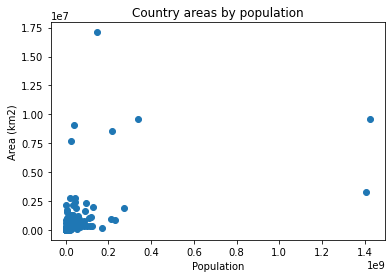

In [ ]:
# Plot a scatterplot (population vs. area (km^2))

# import the needed modules
import matplotlib.pyplot as plt

plt.scatter(df["Population"], df[df.columns[2]])
plt.ylabel("Area (km2)")
plt.xlabel("Population")
plt.title("Country areas by population")